# GA Data Science (DAT19) - Lab 15

### Dimensionality Reduction and Principal Component Analysis (PCA)

In [1]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
from bokeh.plotting import figure,show,output_notebook

output_notebook()
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
# scikit-learn algorithm that is new!
from sklearn.decomposition import PCA


Loading BokehJS ...

###Iris Dataset (i.e. scikit-learn iris)  
Load the sklearn `iris` dataset.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [4]:
X = iris.data
y = iris.target
target_names = iris.target_names

The PCA algorithm takes an argument `n_components` which specifies how many of the principal components we want to keep.  This dataset has only 4 features, so let's try keeping 2 to start: 

In [5]:
# create the model and fit the data
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [6]:
X_r

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

How much of the variance do the first two principal components explain?  The PCA class has an attribute `explained_variance_ratio_` that reports this information:

In [7]:
# Percentage of variance explained (first two components):
print "First component: " + str(pca.explained_variance_ratio_[0])
print "Second component: " + str(pca.explained_variance_ratio_[1])

First component: 0.924616207174
Second component: 0.0530155678505


We can see that the first principal component explains most of the variance.  Since we kept only 2 components we can use a simple 2-dimensional plot to view the datapoints in the new coordinate system.  We'll label them using our known target info:

In [8]:
color_mapping = {0:'red',1:'blue',2:'orange'}

colors = list()

for value in y:
    new_color = color_mapping[value]
    colors.append(new_color)


In [9]:
p = figure(title="PCA in Iris Dataset",tools='')

x_values =  X_r[:,0]
y_values =  X_r[:,1]
p.circle(x = x_values,y=y_values,size = 5,color=colors)

show(p)

We can use a plot to help validate our choice of `n`.  Let's refit the model, but this time keep all components - this is the default behavior if `n_components` is not specified:

In [10]:
# create the model and fit the data - no n_components set:
pca = PCA()
X_r = pca.fit(X).transform(X)

As before, the explained variance ratios are in `pca.explained_variance_ratio_`, but this time there should be 4 ...

In [11]:
ratios = pca.explained_variance_ratio_
print ratios

[ 0.92461621  0.05301557  0.01718514  0.00518309]


In [12]:
print pca.components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


### Exercise: Plot the explained_variance_ratio

In [13]:
p1 = figure(title="PCA Scree Plot (Iris)",tools='')

x_values =  range(1,5)
y_values =  ratios
p1.line(x=x_values,y=ratios,color='red')
p1.circle(x = x_values,y=ratios,size = 5,color='red')

show(p1)

This is called a Scree plot, used to determine a reasonable amount of components to keep

###Let's see how the model performs. So a concern if we're taking features away is are we losing too much information? And if we're losing information, are we gaining speed?

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

We can use the `%%timeit` magic function to time how long a cell takes.

In [15]:
%%timeit model = KNeighborsClassifier(2)
model.fit(X_train, y_train)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 216 µs per loop


In [16]:
model = KNeighborsClassifier(2)
model.fit(X_train, y_train)
print classification_report(y_test,model.predict(X_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



In [17]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r,y, test_size=0.2, random_state=0)

In [18]:
%%timeit model = KNeighborsClassifier(2)
model.fit(X_r_train, y_r_train)

1000 loops, best of 3: 214 µs per loop


Multiple runs can cache results and will bring the times closer togehter. 

In [19]:
model = KNeighborsClassifier(2)
model.fit(X_r_train, y_r_train)
print classification_report(y_r_test,model.predict(X_r_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



###Handwritten Digits Dataset (i.e. scikit-learn digits)  

Load the sklearn `digits` dataset, which contains a set of 8x8 pixel images of handwritten digits.  This is one of the built-in datasets included in scikit-learn.

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

Take a look at the dataset:

In [21]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Notice that each row in the dataset has 64 features, one for each of the individual pixels making up the image, where the value of each feature is the greyscale level (0 to 15).

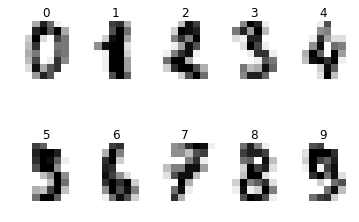

In [22]:
# print digits
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [23]:
X, y = pd.DataFrame(digits.data), pd.DataFrame(digits.target)

print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797, 1)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

n_samples=1797
n_features=64


In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


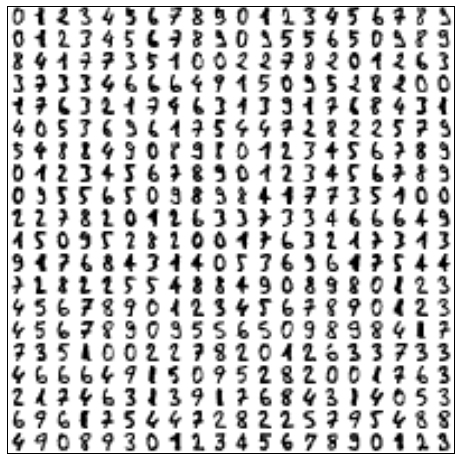

In [26]:
n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X.ix[i*n_img_per_row + j].reshape((8, 8)) # set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8)

plt.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
plt.imshow(img, cmap=plt.cm.binary) # show the image using a binary color map
plt.xticks([]) # no x ticks
plt.yticks([]) # no y ticks
print

### EXERCISE: Priciple Component Analysis for Digits Data Set

#### 1. Fit and transform digits data set using PCA

In [27]:
pca_digits = PCA()
X_r_digits = pca_digits.fit(X).transform(X)

#### 2. What are the explained variance ratios

In [28]:
print pca_digits.explained_variance_ratio_
ratios_digits = pca_digits.explained_variance_ratio_

[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

#### 3. Plot the variances and determine appropriate number of components to use.

In [29]:
p2 = figure(title="PCA Scree Plot (Digits)",tools='')

x_values =  range(1,65)
y_values =  ratios_digits
p2.line(x=x_values,y=ratios_digits,color='red')
p2.circle(x = x_values,y=ratios_digits,size = 5,color='red')

show(p2)

#### 4. Show the digits of the PCA transformed version of the digits data!

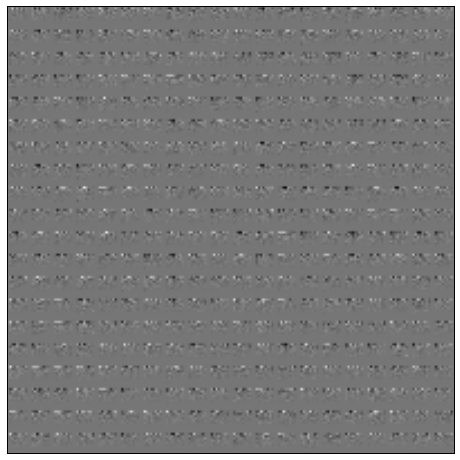

In [30]:
X_r_digits_np = pd.DataFrame(X_r_digits)

n_img_per_row = 20 # number of digits per row
img = np.zeros((10*n_img_per_row, 10*n_img_per_row)) # generate a new 200x200 array filled with zeros
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X_r_digits_np.ix[i*n_img_per_row + j].reshape((8, 8)) # set each 8x8 area of the img to the values of each row (reshaped from 1x64 to 8x8)

plt.figure(figsize=(8, 8), dpi=250) # define a figure, with size (width and height) and resolution
#axes(frameon = 0) # remove the frame/border from the axes
plt.imshow(img, cmap=plt.cm.binary) # show the image using a binary color map
plt.xticks([]) # no x ticks
plt.yticks([]) # no y ticks
print

###Bonus Round:
Pick your favorite algorithm and time how long it takes to train

In [31]:
# Using raw data
from timeit import default_timer as timer
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

start = timer()

model_digits = KNeighborsClassifier(20)
model_digits.fit(X_train, y_train)

end = timer()
print(end - start) 

0.00339388847351


/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [32]:
# Using PCA data
from timeit import default_timer as timer
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r_digits_np,y, test_size=0.2, random_state=0)

start = timer()

model_digits = KNeighborsClassifier(20)
model_digits.fit(X_r_train, y_r_train)

end = timer()
print(end - start) 

0.00271701812744


/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
